# 神经网络的复习
## 数学和Python的复习

In [1]:
# 矩阵的四则运算
import numpy as np
X = np.arange(1,10).reshape(3,3)
Y = np.arange(10,19).reshape(3,3)
print(f'X = {X}')
print(f'Y = {Y}')
print(f'X + Y = {X+Y}')
print(f'X - Y = {X-Y}')
print(f'X * Y = {X*Y}')
print(f'X / Y = {X/Y}')

X = [[1 2 3]
 [4 5 6]
 [7 8 9]]
Y = [[10 11 12]
 [13 14 15]
 [16 17 18]]
X + Y = [[11 13 15]
 [17 19 21]
 [23 25 27]]
X - Y = [[-9 -9 -9]
 [-9 -9 -9]
 [-9 -9 -9]]
X * Y = [[ 10  22  36]
 [ 52  70  90]
 [112 136 162]]
X / Y = [[0.1        0.18181818 0.25      ]
 [0.30769231 0.35714286 0.4       ]
 [0.4375     0.47058824 0.5       ]]


In [2]:
# numpy的广播性质，不够的直接补全
X = np.arange(1,10).reshape(3,3)
Y = np.array([1,2,3])
print(f'X = {X}')
print(f'Y = {Y}')
print(f'X + Y = {X+Y}')

X = [[1 2 3]
 [4 5 6]
 [7 8 9]]
Y = [1 2 3]
X + Y = [[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]]


In [3]:
# 向量的内机和矩阵的内积
v1 = np.arange(1, 4)
v2 = np.arange(4, 7)
m1 = np.arange(1, 7).reshape(2,3)
m2 = np.arange(7, 13).reshape(3,2)
print(f'v1 = {v1}')
print(f'v2 = {v2}')
print(f'm1 = {m1}')
print(f'm2 = {m2}')
print(f'v1.dot(v2) = {v1.dot(v2)}')
print(f'm1.dot(m2) = {m1.dot(m2)}')


v1 = [1 2 3]
v2 = [4 5 6]
m1 = [[1 2 3]
 [4 5 6]]
m2 = [[ 7  8]
 [ 9 10]
 [11 12]]
v1.dot(v2) = 32
m1.dot(m2) = [[ 58  64]
 [139 154]]


In [4]:
# 一些深入理解，试错
# 两个向量做点积操作时，np对行向量、列向量不敏感，只是简单的做点积
# 只要保证两个向量的长度一样，最后输出一个标量就可以了
print(f'v1.dot(v2) = {v1.dot(v2)}')
print(f'v1.dot(v2.T) = {v1.dot(v2.T)}')
# 向量和矩阵做点积时，np是把向量当成一个行向量处理的
# 会报错，v1.dim[0] != m1.dim[0]
# print(f'v1.dot(m1) = {v1.dot(m1)}')
print(f'v1.dot(m1.T) = {v1.dot(m1.T)}')

v1.dot(v2) = 32
v1.dot(v2.T) = 32
v1.dot(m1.T) = [14 32]


## 神经网络的推理
- 神经网络推理：用的是矩阵的乘法，是一个正向传播的过程，为的是描绘了从输入到输出的过程
- 神经网络学习：用的是导数或梯度，是一个反向传播的过程，为的是求解出来最优的参数，即寻找最好的假设

In [5]:
# 模仿神经网络的前线传播
x = np.random.randn(10,2) # 10个样本，2个特征
W1 = np.random.randn(2, 4) # 4个神经元，每个神经元上有两个权重参数
b1 = np.random.randn(4) # 4个偏置
y = x.dot(W1) + b1
print(f'x = {x}')
print(f'W1 = {W1}')
print(f'b1 = {b1}')
print(f'y = {y}')

x = [[ 0.62653337 -0.552979  ]
 [-0.9520352   0.23762954]
 [-0.09752724  0.25475613]
 [-0.51042304 -0.25760947]
 [ 0.53388914 -1.44918337]
 [ 0.95601421  1.0933019 ]
 [-0.29354884 -0.0517866 ]
 [-0.15412597 -0.47939242]
 [-0.48251533  1.98678073]
 [-1.12764586 -0.54508709]]
W1 = [[ 0.36607087  0.59791697  0.95424091  1.16920601]
 [-1.12623964 -1.67963229 -0.25207239  1.18594923]]
b1 = [-0.26488781 -0.06951758  0.53048374 -0.32671743]
y = [[ 0.58725468  1.23389874  1.26773825 -0.24997587]
 [-0.88102797 -1.03788582 -0.43788705 -1.15802615]
 [-0.58750614 -0.55572738  0.37320227 -0.13861903]
 [-0.16160882  0.05798101  0.10835342 -1.22901887]
 [ 1.56268121  2.68379897  1.40524172 -1.42114894]
 [-1.1462388  -1.33424563  1.16716038  2.08766068]
 [-0.31402337 -0.15805297  0.26342139 -0.73135278]
 [ 0.21860191  0.64353088  0.50425203 -1.07545751]
 [-2.67911384 -3.69508273 -0.43076471  1.46534381]
 [-0.06378742  0.1717897  -0.40816067 -2.29161336]]


In [6]:
# 带激活函数的前线传播
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))
X = np.random.randn(10,2)
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
W2 = np.random.randn(4,2)
b2 = np.random.randn(2)
h = np.dot(X, W1) + b1
a = sigmoid(h)
y = np.dot(a, W2) + b2
print(f'X.shape = {X.shape}')
print(f'W1.shape = {W1.shape}')
print(f'b1.shape = {b1.shape}')
print(f'W2.shape = {W2.shape}')
print(f'b2.shape = {b2.shape}')
print(f'h.shape = {h.shape}')
print(f'a.shape = {a.shape}')
print(f'y.shape = {y.shape}')

X.shape = (10, 2)
W1.shape = (2, 4)
b1.shape = (4,)
W2.shape = (4, 2)
b2.shape = (2,)
h.shape = (10, 4)
a.shape = (10, 4)
y.shape = (10, 2)


## 神经网络的学习
- 损失函数
- 连式法则：误差反向传递
### 计算图
- 使用计算图是辅助理解反向传播的重要方法
- 加法算子的反向传播会原封不动的向下游传递梯度
- 乘法算子的反向传播会将信号翻转后向下游传递梯度
- 分支算子的反向传播会将信合合并起来向下游传递梯度
- 矩阵乘法的算子会将信号翻转转置后向下游传递梯度，比较麻烦，需要结合矩阵大小想象

## 使用神经网络解决实际问题
### 螺旋状数据集

In [7]:
%run ./dataset/spiral.py

In [8]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from dataset.spiral import load_data

x, t = load_data()
print(f'x.shape = {x.shape}')
print(f't.shape = {t.shape}')

x.shape = (300, 2)
t.shape = (300, 3)


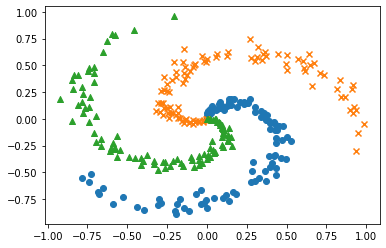

In [9]:
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[N*i:N*(i+1), 0], x[N*i:N*(i+1), 1], marker=markers[i])
plt.show()

In [10]:
%run ./common/layers.py

In [11]:
import sys
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

In [12]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        # 初始化权重偏置
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        # 初始化层
        self.layers = [Affine(W1, b1), Sigmoid(), Affine(W2, b2)]
        self.loss_layer = SoftmaxWithLoss()
        # 将所有的参数和梯度放到一个列表中
        self.params, self.grads = [], []
        for layer in self.layers:
            # 列表的 += -> append
            self.params += layer.params
            self.grads += layer.grads
    # 推理
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    # 前项传播
    def forward(self, x, t):
        # 预测
        score = self.predict(x)
        # 计算损失
        loss = self.loss_layer.forward(score, t)
        return loss
    # 后项传播
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [13]:
%run ./common/optimizer.py

In [14]:
import sys
import numpy as np
from common.optimizer import SGD
from dataset import spiral

In [15]:
# 设定超参数
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 读入数据
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 学习用的变量
data_size = len(x)
max_iters = data_size//batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        # 前项传播
        loss = model.forward(batch_x, batch_t)
        # 后项传播
        model.backward()
        # 更新参数
        optimizer.update(model.params, model.grads)
        total_loss += loss
        loss_count += 1
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print(f'| epoch {epoch+1:d} |  iter {iters+1:d} / {max_iters:d} | loss {avg_loss:.6f}')
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

| epoch 1 |  iter 10 / 10 | loss 1.125606
| epoch 2 |  iter 10 / 10 | loss 1.125520
| epoch 3 |  iter 10 / 10 | loss 1.116261
| epoch 4 |  iter 10 / 10 | loss 1.116287
| epoch 5 |  iter 10 / 10 | loss 1.112300
| epoch 6 |  iter 10 / 10 | loss 1.138464
| epoch 7 |  iter 10 / 10 | loss 1.159096
| epoch 8 |  iter 10 / 10 | loss 1.108632
| epoch 9 |  iter 10 / 10 | loss 1.117331
| epoch 10 |  iter 10 / 10 | loss 1.128796
| epoch 11 |  iter 10 / 10 | loss 1.116844
| epoch 12 |  iter 10 / 10 | loss 1.108339
| epoch 13 |  iter 10 / 10 | loss 1.087615
| epoch 14 |  iter 10 / 10 | loss 1.076681
| epoch 15 |  iter 10 / 10 | loss 1.044238
| epoch 16 |  iter 10 / 10 | loss 1.034578
| epoch 17 |  iter 10 / 10 | loss 0.957293
| epoch 18 |  iter 10 / 10 | loss 0.918385
| epoch 19 |  iter 10 / 10 | loss 0.924149
| epoch 20 |  iter 10 / 10 | loss 0.868514
| epoch 21 |  iter 10 / 10 | loss 0.849381
| epoch 22 |  iter 10 / 10 | loss 0.817163
| epoch 23 |  iter 10 / 10 | loss 0.792441
| epoch 24 |  iter 1